In [65]:
#Librerias
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import itertools


In [66]:
dt=pd.read_csv('juegos.csv')
dt.head()

,Unnamed: 0,index,Rank,Name,Platform,Platform2,Year,Year2,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genero,Plataforma
0,0,0,1.0,Wii Sports,Wii,Wii,2006.0,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0,15.0
1,1,1,2.0,Super Mario Bros.,NES,OTRA,1985.0,1993,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1,20.0
2,2,2,3.0,Mario Kart Wii,Wii,Wii,2008.0,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,7,15.0
3,3,3,4.0,Wii Sports Resort,Wii,Wii,2009.0,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,15.0
4,4,4,5.0,Pokemon Red/Pokemon Blue,GB,OTRA,1996.0,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,11,20.0


In [67]:
#Eliminando valores missing
data_clean = dt.dropna()

In [68]:
#Indicamos las variables predictorias y objetivo
predictors = data_clean[['Rank','Genero','Global_Sales','Plataforma','Year2']]
targets = data_clean.Genero

In [69]:
#Muestra de entrenamiento al 80%
pred_train,pred_test,tar_train,tar_test = train_test_split(predictors,targets,
                                      test_size = 0.8)

In [70]:
#Iniciamos algoritmo con 10 arboles
classifier=RandomForestClassifier(n_estimators=10)

In [71]:
#Construimos modelo sobre datos entrenados
classifier=classifier.fit(pred_train,tar_train)

In [72]:
#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

In [73]:
#iniciamos ExtraTreesClassifier
model = ExtraTreesClassifier()

In [74]:
#Ajustamos el modelo
model.fit(pred_train,tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
#Pedimos que nos muestre la importancia de cada variable
#list(model.feature_importances_)
header = predictors.iloc[0:]
list(zip(header, model.feature_importances_ ))

[('Rank', 0.039566934524834459),
 ('Genero', 0.86688464082082528),
 ('Global_Sales', 0.028675988750268739),
 ('Plataforma', 0.028863999615016418),
 ('Year2', 0.03600843628905516)]

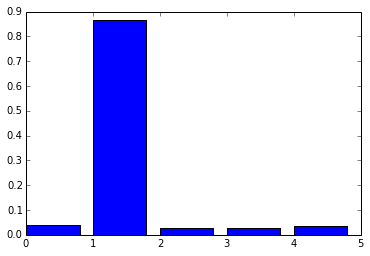

In [95]:
#Para dibujar todos las variables con su importancia
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

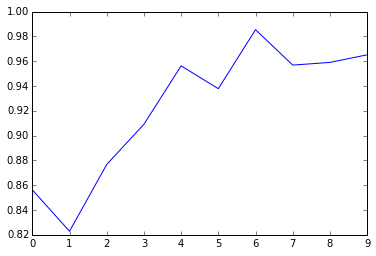

In [96]:
#Para ver cuánto ha aportado cada nuevo árbol que hemos construido

trees=range(10)
accuracy=np.zeros(10)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
    
plt.cla()
plt.plot(trees, accuracy)
pyplot.show()

In [78]:
#Indice de Accuracy_score
sklearn.metrics.accuracy_score(tar_test, predictions)

0.97290659298487991

In [79]:
#Pedimos la matriz de confusión
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1839,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1,  693,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0, 2614,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0, 1002,    2,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,   21, 1334,    1,    4,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    5,   31,  605,   11,   23,    2,    0,    1,
           0],
       [   0,    0,    0,    2,    8,   17,  412,    5,    0,    0,    0,
           0],
       [   0,    0,    0,    1,    0,    4,   12,  962,    6,    2,    0,
           0],
       [   0,    0,    0,    0,    0,    2,    3,   30,  985,   13,    0,
           0],
       [   0,    0,    0,    1,    0,    2,    0,    4,   50,  608,    8,
           1],
       [   0,    1,    0,    3,    0,    0,    0,    2,    9,   44,  466,
           5],
       [   0,    0,  

In [80]:
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((tar_train == model.predict(pred_train)).mean()))

precisión del modelo:  1.00
